c:\Users\minak\AppData\Local\Programs\Python\Python39\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


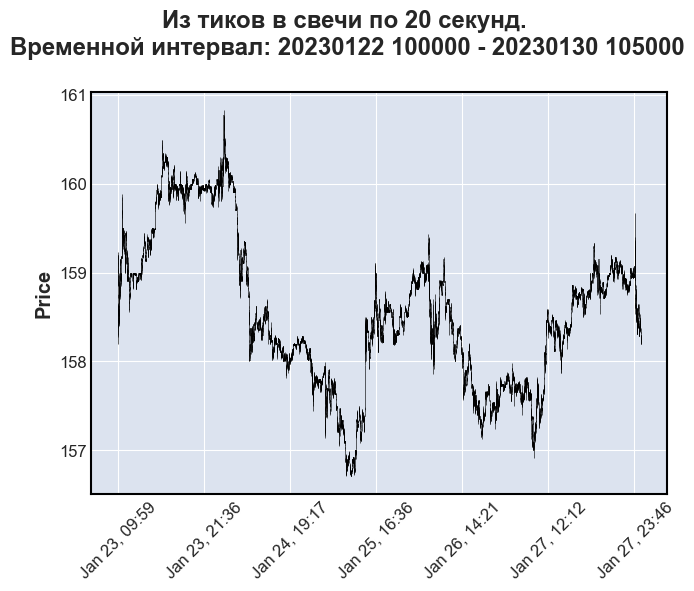

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import TickConvertor as tc

date_start = '20230122'
time_start = '100000'
date_end = '20230130'
time_end = '105000'
file_path = r'GAZP_230123_230130.csv'

# Данные для свечного графика
Convertor = tc.TickConvertor()

# Преобразование тиковых данных в свечи N секунд
N = 20
first = Convertor.tick_to_candles_N_seconds(file_path=file_path, date_start=date_start, time_start=time_start, date_end=date_end, time_end=time_end, N=N)

# Преобразование столбца 'date' в тип datetime
first['date'] = pd.to_datetime(first['date'].astype(str) + ' ' + first['time'].astype(str), format='%Y%m%d %H%M%S')

# Настройка индекса DataFrame по столбцу 'date'
first.set_index('date', inplace=True)

# Добавление подписи с временным интервалом
time_interval_label = 'Временной интервал: ' + date_start + ' ' + time_start + ' - ' + date_end + ' ' + time_end

# Создание свечного графика с помощью mplfinance
mpf.plot(first, type='candle', title='Из тиков в свечи по ' + str(N) + ' секунд. \n' + time_interval_label, returnfig=True)

plt.show()


c:\Users\minak\AppData\Local\Programs\Python\Python39\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


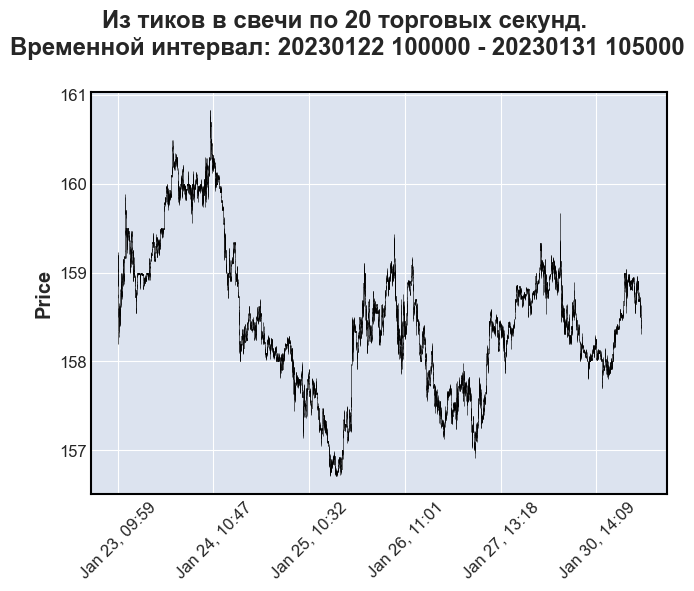

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf  # Библиотека для свечных графиков

import TickConvertor as tc

date_start = '20230122'
time_start = '100000'
date_end = '20230131'
time_end = '105000'
file_path = r'GAZP_230123_230130.csv'

# Данные для свечного графика
Convertor = tc.TickConvertor()

# Use methods that convert tick to candles N seconds
N = 20
second = Convertor.tick_to_candles_N_trade_second(file_path=file_path, date_start=date_start, time_start=time_start,
                                                  date_end=date_end, time_end=time_end, N=N)

second['date'] = pd.to_datetime(second['date'].astype(str) + ' ' + second['time'].astype(str), format='%Y%m%d %H%M%S')

#columns_to_drop = ['time', 'timestamp', 'is_trade_session', 'change', 'wprice', 'buy_volume', 'sell_volume', 'tick_count', 'buy_tick_count', 'sell_tick_count']  # список названий столбцов для удаления
#second = second.drop(columns=columns_to_drop)

# Заменить значения NaN на нули или другое значение по вашему выбору
second['open'].fillna(0, inplace=True)
second['close'].fillna(0, inplace=True)
second['high'].fillna(0, inplace=True)
second['low'].fillna(0, inplace=True)


# Проверить наличие NaN значений после замены
if second.isnull().values.any():
    # Если после замены значения NaN все еще остались, возможно, вам нужно провести дополнительную обработку данных
    # или удалить строки с NaN значениями
    raise ValueError('Data contains NaN values.')

second['open'] = second['open'].astype(float)
second['close'] = second['close'].astype(float)
second['high'] = second['high'].astype(float)
second['low'] = second['low'].astype(float)
second['volume'] = second['volume'].astype(int)

# Настройка индекса DataFrame по столбцу 'date'
second.set_index('date', inplace=True)
# Добавление подписи с временным интервалом
time_interval_label = 'Временной интервал: ' + date_start + ' ' + time_start + ' - ' + date_end + ' ' + time_end

# Создание свечного графика с помощью mplfinance
mpf.plot(second, type='candle', title='Из тиков в свечи по ' + str(N) + ' торговых секунд. \n' + time_interval_label, volume=False)

plt.show()

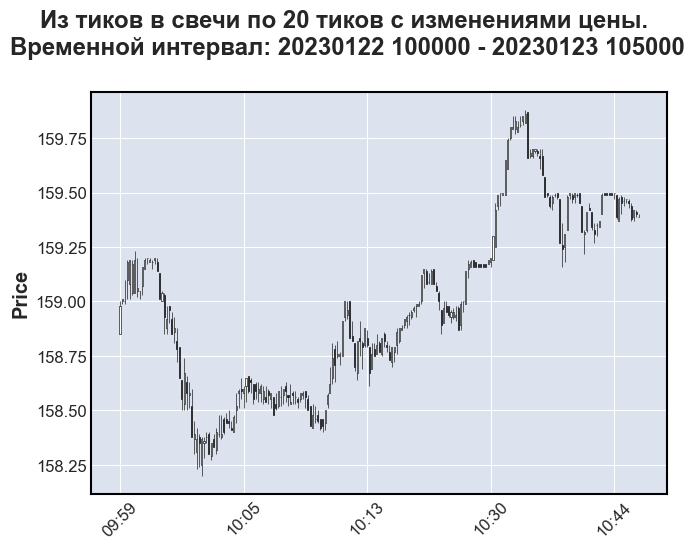

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf  # Библиотека для свечных графиков

import TickConvertor as tc

date_start = '20230122'
time_start = '100000'
date_end = '20230123'
time_end = '105000'
file_path = r'GAZP_230123_230130.csv'

# Данные для свечного графика
Convertor = tc.TickConvertor()
N = 20
third = Convertor.tick_to_N_change_tick_candles(file_path=file_path, date_start=date_start, time_start=time_start,
                                                date_end=date_end, time_end=time_end, N=N)

# Преобразование столбца 'date' в тип datetime
third['date'] = pd.to_datetime(third['date'].astype(str) + ' ' + third['time'].astype(str), format='%Y%m%d %H%M%S')

# Заменить значения NaN на нули или другое значение по вашему выбору
third['open'].fillna(0, inplace=True)
third['close'].fillna(0, inplace=True)
third['high'].fillna(0, inplace=True)
third['low'].fillna(0, inplace=True)
third['volume'] = third['volume'].astype(int)

# Проверить наличие NaN значений после замены
if third.isnull().values.any():
    # Если после замены значения NaN все еще остались, возможно, вам нужно провести дополнительную обработку данных
    # или удалить строки с NaN значениями
    raise ValueError('Data contains NaN values.')

third['open'] = third['open'].astype(float)
third['close'] = third['close'].astype(float)
third['high'] = third['high'].astype(float)
third['low'] = third['low'].astype(float)
third['volume'] = third['volume'].astype(int)

# Настройка индекса DataFrame по столбцу 'date'
third.set_index('date', inplace=True)

time_interval_label = 'Временной интервал: ' + date_start + ' ' + time_start + ' - ' + date_end + ' ' + time_end

# Создание свечного графика с помощью mplfinance
mpf.plot(third, type='candle', title='Из тиков в свечи по ' + str(N) + ' тиков с изменениями цены. \n' + time_interval_label)

plt.show()

c:\Users\minak\AppData\Local\Programs\Python\Python39\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


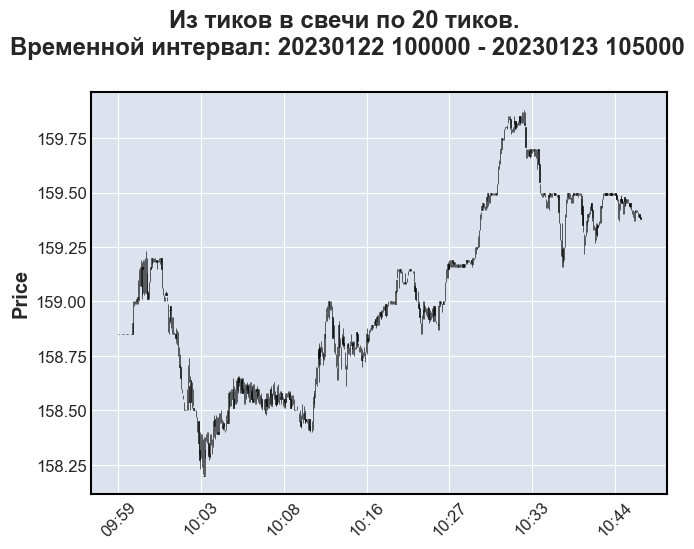

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf  # Библиотека для свечных графиков

import TickConvertor as tc

date_start = '20230122'
time_start = '100000'
date_end = '20230123'
time_end = '105000'
file_path = r'GAZP_230123_230130.csv'

# Данные для свечного графика
Convertor = tc.TickConvertor()
N = 20
fourth = Convertor.tick_to_candles_N_tick(file_path=file_path, date_start=date_start, time_start=time_start, date_end=date_end, time_end=time_end, N=N)

# Преобразование столбца 'date' в тип datetime
fourth['date'] = pd.to_datetime(fourth['date'].astype(str) + ' ' + fourth['time'].astype(str), format='%Y%m%d %H%M%S')

# Заменить значения NaN на нули или другое значение по вашему выбору
fourth['open'].fillna(0, inplace=True)
fourth['close'].fillna(0, inplace=True)
fourth['high'].fillna(0, inplace=True)
fourth['low'].fillna(0, inplace=True)
fourth['volume'] = fourth['volume'].astype(int)

# Проверить наличие NaN значений после замены
if fourth.isnull().values.any():
    # Если после замены значения NaN все еще остались, возможно, вам нужно провести дополнительную обработку данных
    # или удалить строки с NaN значениями
    raise ValueError('Data contains NaN values.')

fourth['open'] = fourth['open'].astype(float)
fourth['close'] = fourth['close'].astype(float)
fourth['high'] = fourth['high'].astype(float)
fourth['low'] = fourth['low'].astype(float)
fourth['volume'] = fourth['volume'].astype(int)

# Настройка индекса DataFrame по столбцу 'date'
fourth.set_index('date', inplace=True)

time_interval_label = 'Временной интервал: ' + date_start + ' ' + time_start + ' - ' + date_end + ' ' + time_end


# Создание свечного графика с помощью mplfinance
mpf.plot(fourth, type='candle', title='Из тиков в свечи по ' + str(N) + ' тиков. \n' + time_interval_label)

plt.show()